# Heart Attack Prediction

#### Author: Subramanya K S

#### Import necessary python library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

#### import dataset

In [2]:
#importing the dataset
heart = pd.read_csv('E:\ML intern\project\dataset\heart.csv')
#list the first five  rows
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heart.shape

(303, 14)

In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


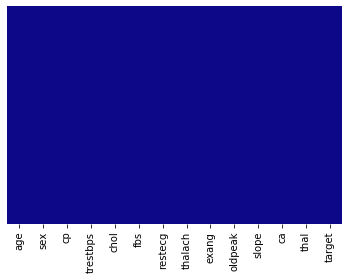

In [6]:
sns.heatmap(heart.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [7]:
heart.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

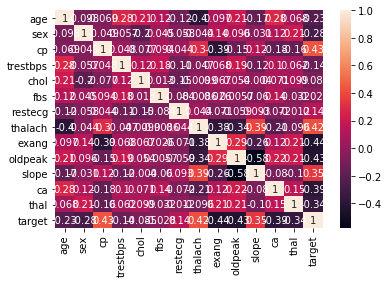

In [8]:
sns.heatmap(heart.corr(),annot= True)

In [9]:
heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

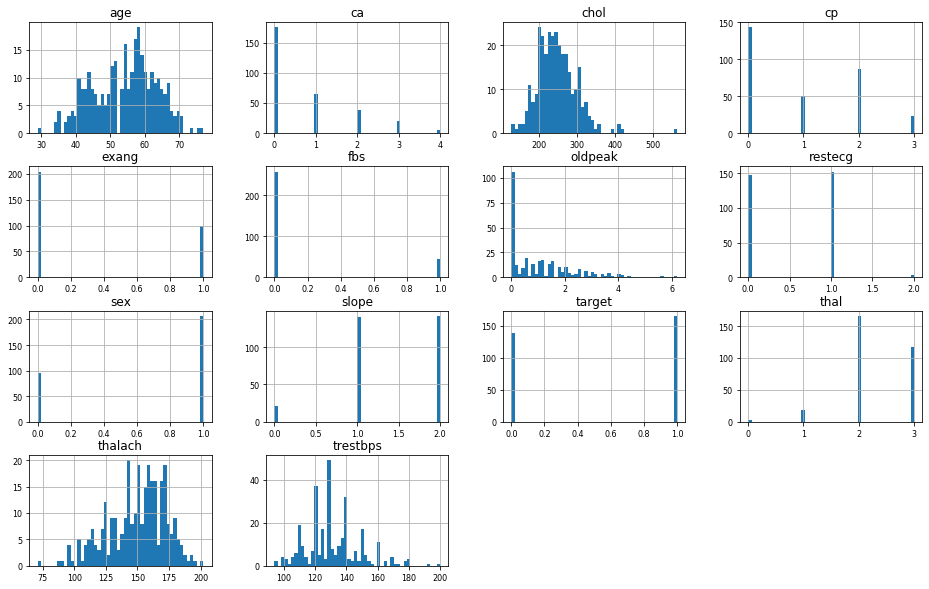

In [10]:
heart.hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8);

In [11]:
X=heart.iloc[:,:-1].values 
y=heart.iloc[:,-1].values

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#### Feature Scalling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
dclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dclassifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [15]:
y_pred = dclassifier.predict(X_test)

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusm = confusion_matrix(y_test, y_pred)
confusm

array([[24,  9],
       [ 6, 37]], dtype=int64)

In [17]:
accuracy_score(y_test,y_pred)

0.8026315789473685

In [18]:
print(f"Training accuracy {round(dclassifier.score(X_train,y_train)*100,2)}%")
print(f"Testing accuracy {round(dclassifier.score(X_test,y_test)*100,2)}%")

Training accuracy 100.0%
Testing accuracy 80.26%


### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred=model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[24,  9],
       [ 4, 39]], dtype=int64)

In [22]:
accuracy_score(y_test,y_pred)

0.8289473684210527

In [23]:
print(f"Training accuracy {round(model.score(X_train,y_train)*100,2)}%")
print(f"Testing accuracy {round(model.score(X_test,y_test)*100,2)}%")

Training accuracy 85.9%
Testing accuracy 82.89%


### Gaussian Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB  
bclassifier = GaussianNB()  
bclassifier.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
y_pred = bclassifier.predict(X_test)  

In [26]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  
cm

array([[24,  9],
       [ 4, 39]], dtype=int64)

In [27]:
accuracy_score(y_test,y_pred)

0.8289473684210527

In [28]:
print(f"Training accuracy {round(bclassifier.score(X_train,y_train)*100,2)}%")
print(f"Testing accuracy {round(bclassifier.score(X_test,y_test)*100,2)}%")

Training accuracy 85.46%
Testing accuracy 82.89%


### Bernouli Naive Bayes

In [29]:
from sklearn.naive_bayes import BernoulliNB  
bclassifier = BernoulliNB()  
bclassifier.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [30]:
y_pred = bclassifier.predict(X_test) 

In [31]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  
cm

array([[26,  7],
       [ 6, 37]], dtype=int64)

In [32]:
accuracy_score(y_test,y_pred)

0.8289473684210527

In [33]:
print(f"Training accuracy {round(bclassifier.score(X_train,y_train)*100,2)}%")
print(f"Testing accuracy {round(bclassifier.score(X_test,y_test)*100,2)}%")

Training accuracy 84.58%
Testing accuracy 82.89%


### K Nearest Neighbour

In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix
cmatrix =confusion_matrix(y_test,y_pred)
cmatrix

array([[23, 10],
       [ 4, 39]], dtype=int64)

In [37]:
accuracy_score(y_test,y_pred)

0.8157894736842105

In [38]:
print(f"Training accuracy {round(classifier.score(X_train,y_train)*100,2)}%")
print(f"Testing accuracy {round(classifier.score(X_test,y_test)*100,2)}%")

Training accuracy 85.46%
Testing accuracy 81.58%


### Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier  
rclassifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rclassifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
y_pred= rclassifier.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix  
conm= confusion_matrix(y_test, y_pred) 
conm

array([[27,  6],
       [ 9, 34]], dtype=int64)

In [42]:
accuracy_score(y_test,y_pred)

0.8026315789473685

In [43]:
print(f"Training accuracy {round(rclassifier.score(X_train,y_train)*100,2)}%")
print(f"Testing accuracy {round(rclassifier.score(X_test,y_test)*100,2)}%")

Training accuracy 98.68%
Testing accuracy 80.26%


### Support Vector Machine

In [44]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',random_state=0)
svclassifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [45]:
y_pred = svclassifier.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
confusm = confusion_matrix(y_test,y_pred)
confusm

array([[24,  9],
       [ 2, 41]], dtype=int64)

In [47]:
accuracy_score(y_test,y_pred)

0.8552631578947368

In [48]:
print(f"Training accuracy {round(svclassifier.score(X_train,y_train)*100,2)}%")
print(f"Testing accuracy {round(svclassifier.score(X_test,y_test)*100,2)}%")

Training accuracy 85.02%
Testing accuracy 85.53%


### Kernel Support Machine

In [49]:
from sklearn.svm import SVC
ksclassifier = SVC(kernel = 'rbf' ,random_state = 0)
ksclassifier.fit(X_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [50]:
y_pred = ksclassifier.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix  
#Here confusion_matrix is a function and not a class as class has capitalletters at the beginning.
cm = confusion_matrix(y_test , y_pred)
cm

array([[25,  8],
       [ 3, 40]], dtype=int64)

In [52]:
accuracy_score(y_test,y_pred)

0.8552631578947368

In [53]:
print(f"Training accuracy {round(ksclassifier.score(X_train,y_train)*100,2)}%")
print(f"Testing accuracy {round(ksclassifier.score(X_test,y_test)*100,2)}%")

Training accuracy 91.63%
Testing accuracy 85.53%
